# Laboratory: YRBSS

### The data
Every two years, the Centers for Disease Control and Prevention conduct the Youth Risk Behavior Surveillance System (YRBSS) survey, where it takes data from high schoolers (9th through 12th grade), to analyze health patterns. You will work with a selected group of variables from a random sample of observations during one of the years the YRBSS was conducted.

Let's define the paths of the datasets.

In [27]:
%matplotlib inline

from pathlib import Path 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

YRBSS_SAMP_PATH = Path("../datasets/yrbss_samp.csv")
YRBSS_PATH = Path("../datasets/yrbss.csv")

And read them in.

In [4]:
yrbss_samp_df = pd.read_csv(YRBSS_SAMP_PATH)
yrbss_df = pd.read_csv(YRBSS_PATH)

### Exercise 1 - What are the cases in this data set? How many cases are there in our sample?

In [18]:
print(f"Rows: {yrbss_df.shape[0]}")
print(f"Columns: {yrbss_df.shape[1]}")
for col in yrbss_df.columns:
    print(f"|- {col} <{yrbss_df[col].dtype}> ({yrbss_df[col].nunique()} cases) -|")

Rows: 13583
Columns: 13
|- age <float64> (7 cases) -|
|- gender <object> (2 cases) -|
|- grade <object> (5 cases) -|
|- hispanic <object> (2 cases) -|
|- race <object> (5 cases) -|
|- height <float64> (34 cases) -|
|- weight <float64> (239 cases) -|
|- helmet_12m <object> (6 cases) -|
|- text_while_driving_30d <object> (8 cases) -|
|- physically_active_7d <float64> (8 cases) -|
|- hours_tv_per_school_day <object> (7 cases) -|
|- strength_training_7d <float64> (8 cases) -|
|- school_night_hours_sleep <object> (7 cases) -|


## Exploratory data analysis

You will first start with analyzing the weight of the participants in kilograms: `weight`.

We can use `skimpy`'s `skim` function to get an overview of the data.

In [20]:
# Run it to install skimpy

# ! pip install skimpy

In [21]:
from skimpy import skim 

skim(yrbss_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13583  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %   ┃ mean   ┃ sd   ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ age                        │     77 │   0.57 │     16 │  1.3 │   12 │   15 │   16 │   17 │    18 │   ▂▅▅▇  │  │
│ │ height                     │   1004 │   7.39 │    1.7 │  0.1 │  1.3 │  1.6 │  1.7 │  1.8 │   2.1 │   ▁▇▇▂  │  │
│ │ weight                     │   1004 │   7.39 │     68 │   17 │   30 │   56 │   64 │   76 │   180 │   ▃▇▂   │  │
│ │ physically_active_7d       │    273 │   2.01 │    3.9 │  2.6 │    0 │    2 │    4 │    7 │     7 │ ▆▂▃▂▃▇  │  │
│ │ strength_training_7d       │   1176 │   8.66 │    2.9 │  2.6 │    0 │    0 │    3 │    5 │     7 │ ▇▂▃▂▂▅  │  │
│ └────────────────────────────┴────────┴────────┴────────┴──────┴──────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                              │       12 │       0.09 │                       1 │              13571 │  │
│ │ grade                               │       79 │       0.58 │                    0.99 │              13504 │  │
│ │ hispanic                            │      231 │        1.7 │                    0.98 │              13352 │  │
│ │ race                                │     2805 │      20.65 │                     1.7 │              23047 │  │
│ │ helmet_12m                          │      311 │       2.29 │                     1.7 │              22956 │  │
│ │ text_while_driving_30d              │      918 │       6.76 │                     1.6 │              21957 │  │
│ │ hours_tv_per_school_day             │      338 │       2.49 │                     1.2 │              16925 │  │
│ │ school_night_hours_sleep            │     1248 │       9.19 │                    0.91 │              12335 │  │
│ └─────────────────────────────────────┴──────────┴────────────┴─────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Exercise 2 - How many observations are we missing weights from?

We are missing `weight` for 1,004 observations.

Next, consider the possible relationship between a high schooler’s weight and their physical activity. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

First, let’s create a new variable `physical_3plus`, which will be coded as either “yes” if the student is physically active for at least 3 days a week, and “no” if not.

In [45]:
yrbss_df["physical_3plus"] = yrbss_df["physically_active_7d"].apply(lambda x: "yes" if x >= 3 else "no")

### Exercise 3 - Make a side-by-side violin plots of physical_3plus and weight. Is there a relationship between these two variables? What did you expect and why?

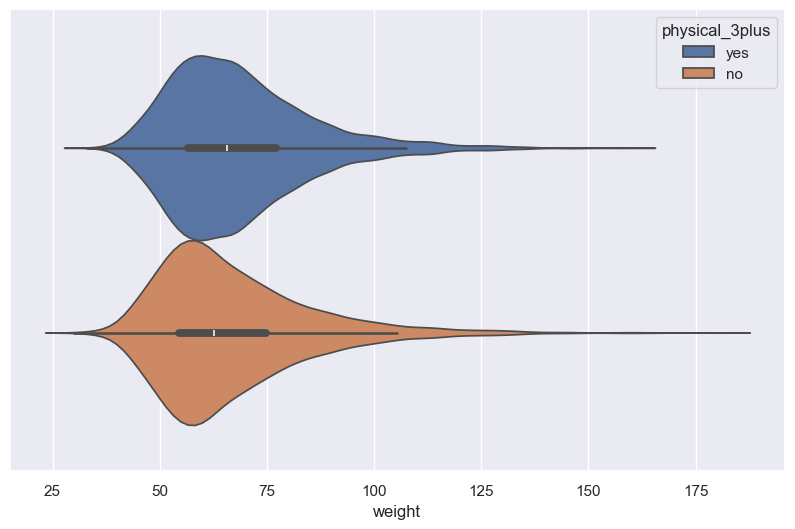

In [61]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x="weight", hue="physical_3plus", data=yrbss_df)

plt.show()